# BoomBikes

- Importing the necessary libraries to read the data set, carry out EDA and suppress warnings.

In [1]:
# importing library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing necessary libraries to read the data and perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#reading the given data set
day = pd.read_csv('day.csv')

In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
day.shape

(730, 16)

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#removing 'instant' column as it is the index
#removing 'dteday' column as the month and year has already been split

day.drop(['instant','dteday'],axis=1,inplace=True)

In [8]:
# looking at the statistical summary of the numerical columns
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
temp = day['casual'] + day['registered']

In [10]:
day[temp!= day['cnt']]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


- It looks like 'cnt' is the sum of 'casual' + 'registered' and hence, the latter two can be dropped.
- 'cnt' is the required target variable and hence that should not be dropped.

In [11]:
#dropping 'cnt' variable
day.drop(['casual','registered'],axis=1,inplace=True)

In [12]:
# performing a sanity check
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


- 'season', 'mnth' and 'weathersit' are categorical values, so they are converted to the appropriate data type.

In [13]:
day[['season','mnth','weathersit']] = day[['season','mnth','weathersit']].astype('category')

In [14]:
# performing a sanity check
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(5)
memory usage: 54.3 KB


##### Observations:
1. 'weathersit' is a categorical variable with no inherent order, so the numerical values can be coverted to strings.

2. Similarly, 'season' is a categorical variable with values that have no inherent order to them, so its advisable to convert it to string values.

3. 'mnth' is a categorical variable with a certain order since they are the months in a given year. So its better to covert the values to strings. 

4. 'weekday' is a categorical variable with a certain order since they are the days in a given week. So its better to covert the values to strings. 

In [15]:
# mapping the values in 'weathersit' to string values as given in the data dictionary

day.weathersit = day.weathersit.map({1:'Clear',
                                     2:'Mist',
                                     3:'Light rain',
                                     4:'Heavy rain'})

# mapping the values in 'season' to string values as given in the data dictionary

day.season = day.season.map({1:'Spring',
                             2:'Summer',
                             3:'Fall',
                             4:'Winter'})

# mapping the values in 'mnth' column based on the values given in the data dictionary

day.mnth = day.mnth.map({1:'January',
                         2:'February',
                         3:'March',
                         4:'April',
                         5:'May',
                         6:'June',
                         7:'July',
                         8:'August',
                         9:'September',
                         10:'October',
                         11:'November',
                         12:'December'})

# mapping the values in 'weekday' column based on the values given the data dictionary

day.weekday = day.weekday.map({0:'Sunday',
                               1:'Monday',
                               2:'Tuesday',
                               3:'Wednesday',
                               4:'Thursday',
                               5:'Friday',
                               6:'Saturday'})

In [16]:
# performing a sanity check
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Plotting the numerical variables

In [17]:
# looking at the summary of numerical variables

day[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


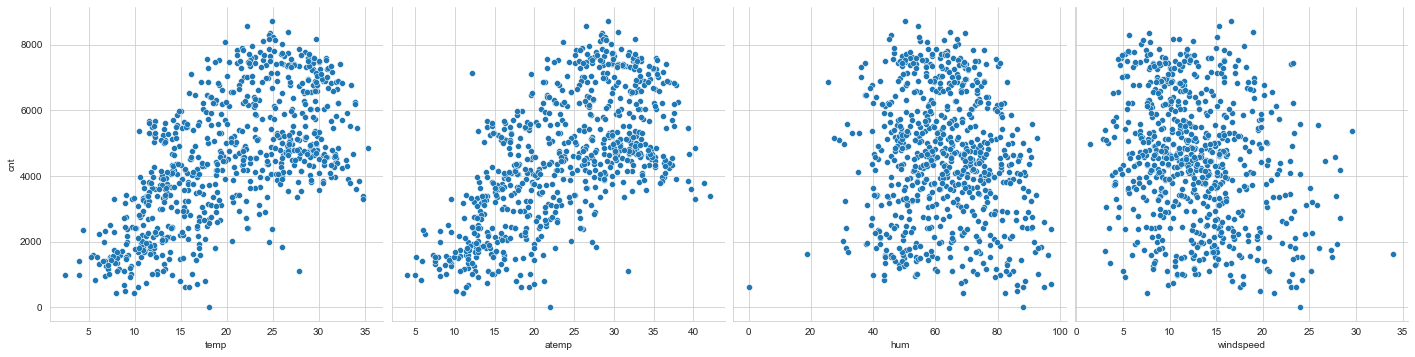

In [18]:
# plotting the above 4 variables against 'cnt' to check for a linear relationship

sns.set_style('whitegrid')
sns.pairplot(day,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',
             diag_kind=None,height=5,aspect=1);

##### Observations:
    - With 'temp' and 'atemp' there seems to be an increasing trend with 'cnt'.
    - 'temp' and 'atemp' looks quite similar. 
    - 'hum' vs 'cnt' has one outlier below 10.

In [19]:
day[day.hum<10]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
68,Spring,0,March,0,Saturday,0,Light rain,15.952731,19.2834,0.0,17.545759,623


- In the above data, there's a data point with a humidity of 0, since it is definitely an anomaly, it can be removed to avoid any bias.

##### Outliers are known to affect the model since even one outlier can significantly affect the slope of the linear regression line. So, it is best that the outliers are dropped before proceeding further. 

In [20]:
## Dropping outliers in the above mentioned columns
# outliers in 'hum' vs 'cnt'
day = day.drop(index = day[(day['hum'] < 10)].index)

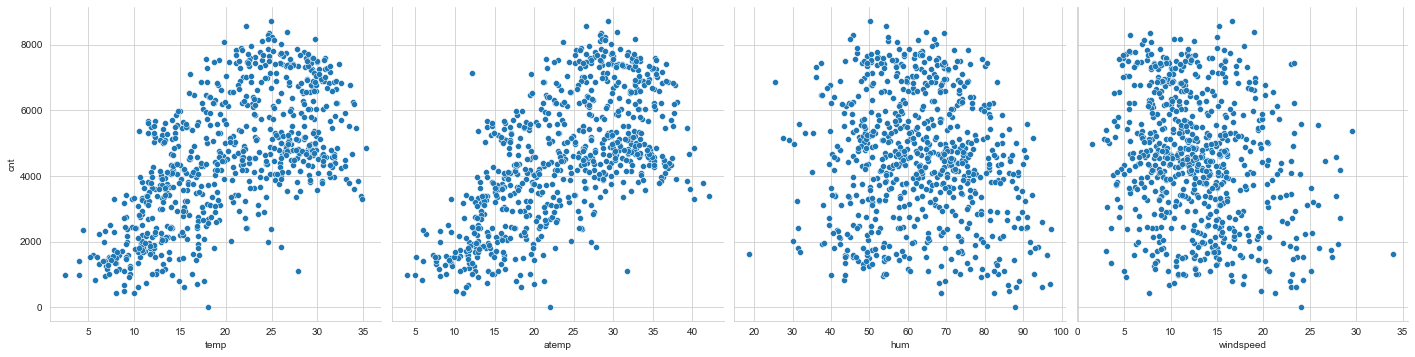

In [21]:
# performing a sanity check

sns.set_style('whitegrid')
sns.pairplot(day,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',
             diag_kind=None,height=5,aspect=1);

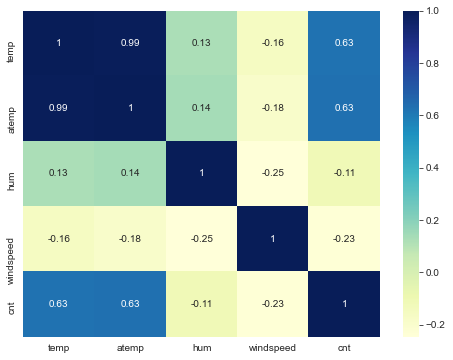

In [22]:
# looking at the correlation between the numerical variables

plt.figure(figsize=(8,6))
sns.heatmap(day[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu');

In [23]:
#checking the correlation between 'temp' and 'atemp' with more decimal places

temp_corr = day[['temp','atemp']].corr().apply(lambda x : round(x,6))
temp_corr

,temp,atemp
temp,1.000000,0.991693
atemp,0.991693,1.000000


##### Observations:
- 'temp' and 'atemp' has a correlation of close to 1. One of them can be dropped. 
- 'atemp' as given in the data dictionary is a feeling-like temperature that may subject to difference from one person to another since it takes into account humidity and windspeed.
- Since those two variables are already available, the 'atemp' column can be dropped to avoid bias in the model. 

In [24]:
# dropping the 'atemp' column

day.drop(['atemp'],axis=1,inplace=True)

In [25]:
# performing sanity check
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


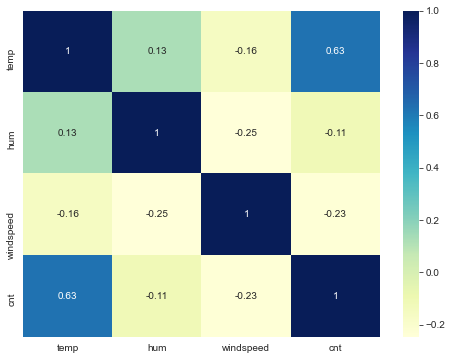

In [26]:
# looking at the correlation between the other numerical variables

plt.figure(figsize=(8,6))
sns.heatmap(day[['temp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu');

- There is no significant correlation between temp and hum, windspeed. Hence, they are left as it is. 

In [27]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [28]:
# Checking for unique values in the categorical columns to make sure there aren't any disguised missing values:

categ_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for x in categ_vars:
    print('Unique values in ', x, day[x].unique())

Unique values in  season ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
Unique values in  yr [0 1]
Unique values in  mnth ['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['January', 'February', 'March', 'April', ..., 'September', 'October', 'November', 'December']
Unique values in  holiday [0 1]
Unique values in  weekday ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
Unique values in  workingday [1 0]
Unique values in  weathersit ['Mist', 'Clear', 'Light rain']
Categories (3, object): ['Mist', 'Clear', 'Light rain']


- There seems to be no unexpected unique values in the categorical variables which is a good sign.

### Plotting the categorical variables

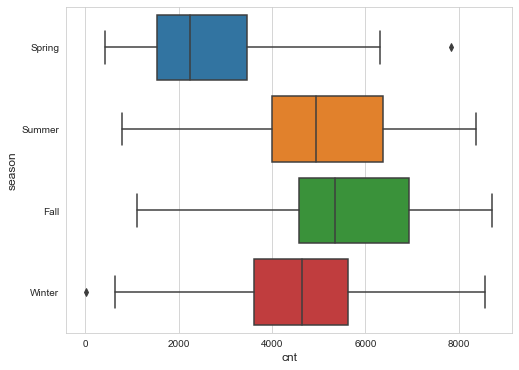

In [29]:
# plotting 'cnt' vs 'season'
plt.figure(figsize=(8,6))
plt.xlabel('cnt',fontsize=12)
plt.ylabel('season',fontsize=12)
sns.boxplot('cnt','season',data=day)
plt.show()

##### Observation:
- Fall season seems to have the highest median when compared to others, closesly followed by Summer and Winter. 
- Spring season doesn't seem to attract many customers. 
- There is an outlier in the Spring index which should be removed. 

In [30]:
# removing the outlier present in 'spring' variable
day = day.drop(index = day[(day['season'] == 'spring') 
                              & (day['cnt'] > 7000)].index)

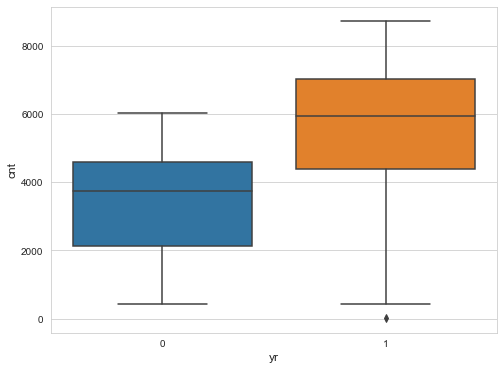

In [31]:
# plotting 'cnt' vs 'yr'
plt.figure(figsize=(8,6))
plt.xlabel('yr',fontsize=12)
plt.ylabel('cnt',fontsize=12)
sns.boxplot('yr','cnt',data=day)
plt.show()

##### Observation:
The year 2019 has recorded a median increase of 2000 customers when compared to the previous year of 2018.

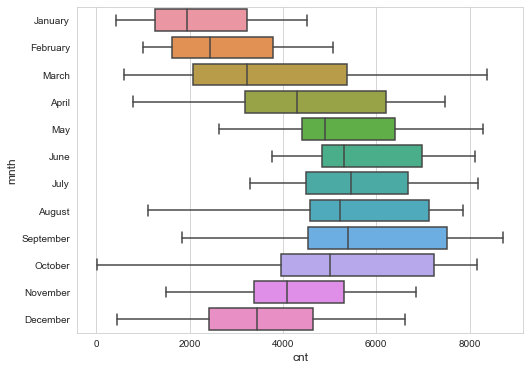

In [32]:
# plotting 'cnt' vs 'mnth'
plt.figure(figsize=(8,6))
plt.xlabel('cnt',fontsize=12)
plt.ylabel('mnth',fontsize=12)
sns.boxplot('cnt','mnth',data=day)
plt.show()

##### Observation:
The month of September has the highest no. of rentals and in general, around the middle of the year (May-August) seems to have more rentals than the rest of the year.

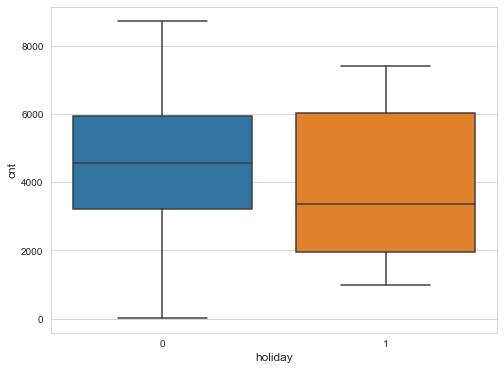

In [33]:
# # plotting 'cnt' vs 'holiday'
plt.figure(figsize=(8,6))
plt.xlabel('holiday',fontsize=12)
plt.ylabel('cnt',fontsize=12)
sns.boxplot('holiday','cnt',data=day)
plt.show()

##### Observation:
During the holidays, less people seem to rent a bike sinceh the median has dropped by 2000 approx. Another point to be noted is that there is a lot more variability in rentals during the holidays. 

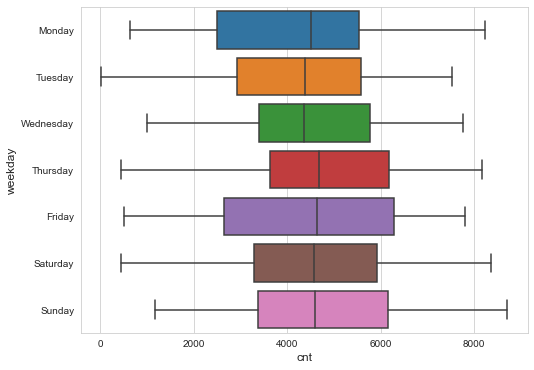

In [34]:
# plotting 'cnt' vs 'weekday'
plt.figure(figsize=(8,6))
plt.xlabel('cnt',fontsize=12)
plt.ylabel('weekday',fontsize=12)
sns.boxplot('cnt','weekday',data=day)
plt.show()

##### Observation:
There is no significant difference in the median values among the different weekdays. Thursday seems to have the highest median among the other days.

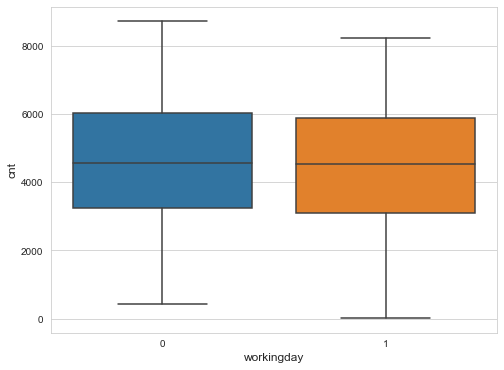

In [35]:
# plotting 'cnt' vs 'workingday'
plt.figure(figsize=(8,6))
plt.xlabel('workingday',fontsize=12)
plt.ylabel('cnt',fontsize=12)
sns.boxplot('workingday','cnt',data=day)
plt.show()

##### Observation:
There is no much difference if the given day is a working day or a weekend or a holiday. The median and the interquartile range seems identical.

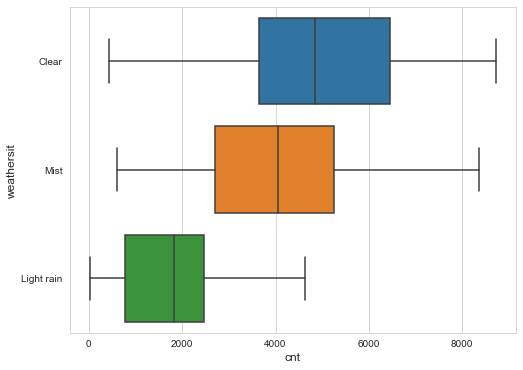

In [36]:
# plotting 'cnt' vs 'weathersit'
plt.figure(figsize=(8,6))
plt.xlabel('cnt',fontsize=12)
plt.ylabel('weathersit',fontsize=12)
sns.boxplot('cnt','weathersit',data=day)
plt.show()

##### Observation:
- As seen in the above plot, when the weather is Clear, the most no. of rentals take place, followed by when there is Mist. 
- When there is Light rain, very low no. of customers seem to rent a bike.

#### Checking for Correlation among all variables in the data

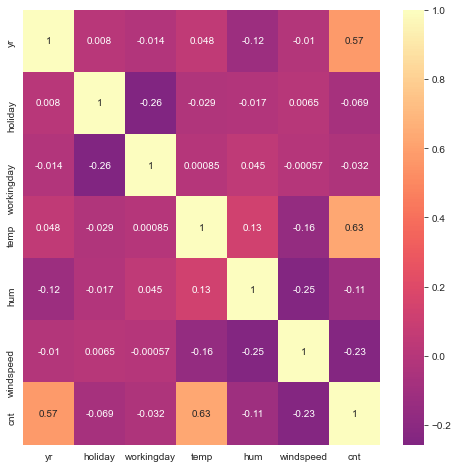

In [37]:
# plotting a heat map for all the variables in the data
plt.figure(figsize=(8,8))
sns.heatmap(day.corr(),annot=True,cmap='magma',center=0);

##### Observation:
- A high correlation can be seen in between 'cnt' and 'temp' closely followed by 'cnt' and 'yr'. 
- 'hum' and 'windspeed' have a negative correlation with 'cnt'.

## Data Preparation
- The given data must be prepared before a linear model can be built from it. 
- Since there are a few categorical variables with values as strings, they need to converted into numerical values with the help of dummy variables.

In [38]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


- 'season', 'mnth', 'weekday', 'weathersit' columns had categorical data that were converted into strings. 
- Since a linear model cannot compute with string values, these columns will have to be converted into indicator variables with the help of dummy values.
- After creating the dummy values, the first column can be dropped because a categorical variable with 'k' levels can be explained perfectly with 'k-1' levels.

In [39]:
# creating dummy values for the following columns

seasons = pd.get_dummies(day['season'],drop_first=True)
months = pd.get_dummies(day['mnth'],drop_first=True)
weekdays = pd.get_dummies(day['weekday'],drop_first=True)
weather = pd.get_dummies(day['weathersit'],drop_first=True)

- Since the above process created 4 new dataframes, they will have to be added to the original dataframe.

In [40]:
day = pd.concat([day,seasons,months,weekdays,weather],axis=1)

- Now that the dummy variables have been created, the original columns can be dropped before proceeding to model building.

In [41]:
day = day.drop(['season','mnth','weekday','weathersit'],axis=1)

In [42]:
# performing a sanity check
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Light rain
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
day.shape

(729, 29)

In [44]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Summer', 'Fall', 'Winter', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Mist', 'Light rain'],
      dtype='object')

#### Now that the data is prepared for model building, it can be split into training and test data sets.

In [45]:
# importing the required library for splitting the dataset

from sklearn.model_selection import train_test_split

In [46]:
# splitting the data into training and test sets
np.random.seed(100)
df_train, df_test = train_test_split(day, train_size=0.7, test_size=0.3, random_state=100)

##### 1. 'cnt' is the target variable also known as the dependent variable. 
##### 2. Other variables such as 'temp', 'hum' and 'windspeed' are independent variables. 
##### 3. The independent variables are all on a different scale and hence they should be scaled before proceeding to build the model

In [47]:
# importing the necessary library to scale the features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
# performing a sanity check
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Light rain
626,1,0,1,0.614763,0.450242,0.371638,0.864421,0,1,0,...,0,0,0,0,0,1,0,0,0,0
364,0,0,1,0.437201,0.552447,0.382342,0.247978,0,0,0,...,0,1,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.559440,0.255342,0.438851,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.381387,0.663106,0.164795,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.389456,0.188475,0.457443,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Light rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.027451,0.688235,0.540678,0.571669,0.318011,0.496352,0.243137,0.266667,0.247059,...,0.082353,0.094118,0.139216,0.147059,0.141176,0.137255,0.150980,0.143137,0.349020,0.021569
std,0.500352,0.163554,0.463669,0.225277,0.182541,0.170567,0.235715,0.429398,0.442651,0.431725,...,0.275172,0.292279,0.346511,0.354512,0.348545,0.344454,0.358381,0.350557,0.477128,0.145413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.350497,0.431818,0.192829,0.333213,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.575578,0.296767,0.498008,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.742223,0.704680,0.414082,0.685832,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Splitting the training dataset into X and y sets. 

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train

In [51]:
#sanity check
y_train.head()

626    0.864421
364    0.247978
426    0.438851
728    0.164795
482    0.457443
Name: cnt, dtype: float64

In [52]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Summer,Fall,Winter,February,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Light rain
626,1,0,1,0.614763,0.450242,0.371638,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
364,0,0,1,0.437201,0.552447,0.382342,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.559440,0.255342,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.381387,0.663106,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.389456,0.188475,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Building a Linear Model

In [53]:
# importing necessary libraries to perfrom RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,15) # Running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
# looking at the columns that were ranked by the RFE method:

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 2),
 ('Winter', True, 1),
 ('February', False, 9),
 ('March', False, 3),
 ('April', False, 6),
 ('May', False, 4),
 ('June', False, 5),
 ('July', False, 14),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 13),
 ('December', False, 11),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10),
 ('Mist', True, 1),
 ('Light rain', True, 1)]

In [55]:
# looking at the columns that have been ranked '1':
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Summer',
       'Winter', 'August', 'September', 'October', 'Saturday', 'Sunday',
       'Mist', 'Light rain'],
      dtype='object')

In [56]:
# looking at the columns that have been ranked otherwise:
X_train.columns[~rfe.support_]

Index(['Fall', 'February', 'March', 'April', 'May', 'June', 'July', 'November',
       'December', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Model 1

In [57]:
#Creating X_train cols based on RFE selected variables

X = X_train[col]

In [58]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Summer',
       'Winter', 'August', 'September', 'October', 'Saturday', 'Sunday',
       'Mist', 'Light rain'],
      dtype='object')

In [59]:
#importing the necessary library to create a linear model
import statsmodels.api as sm 

In [60]:
# building a linear model
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.33e-187
Time:                        15:58:02   Log-Likelihood:                 485.67
No. Observations:                 510   AIC:                            -939.3
Df Residuals:                     494   BIC:                            -871.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2198      0.078      2.829      0.005       0.067       0.372
yr             0.2338      0.009     27.207      0.000       0.217       0.251
holiday       -0.1386      0.069     -2.017      0.044      -0.274      -0.004
workingday    -0.0713      0.074     -0.961      0.337      -0.217       0.074
temp           0.5895      0.023     25.493      0.000       0.544       0.635
hum           -0.1698      0.033     -5.196      0.000      -0.234      -0.106
windspeed     -0.1765      0.027     -6.564      0.000      -0.229      -0.124
Summer         0.1041      0.011      9.143      0.000       0.082       0.126
Winter         0.1413      0.013     11.110      0.000       0.116       0.166
August         0.0546      0.017      3.135      0.002       0.020       0.089
September      0.1293      0.017      7.828      0.000       0.097       0.162
October        0.0413      0.019      2.223      0.027       0.005       0.078
Saturday      -0.0615      0.074     -0.831      0.406      -0.207       0.084
Sunday        -0.0396      0.074     -0.535      0.593      -0.185       0.106
Mist          -0.0488      0.011     -4.353      0.000      -0.071      -0.027
Light rain    -0.1869      0.033     -5.707      0.000      -0.251      -0.123
==============================================================================
Omnibus:                       68.249   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.893
Skew:                          -0.756   Prob(JB):                     6.92e-31
Kurtosis:                       5.062   Cond. No.                         64.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking VIF

In [61]:
# importing the required library to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,20.56
2,workingday,20.17
3,temp,10.27
5,windspeed,5.21
11,Saturday,4.87
12,Sunday,4.65
13,Mist,2.48
7,Winter,2.25
0,yr,2.11
6,Summer,1.79


- The 'workingday' column can be dropped since it has a high p-value as well as a high VIF.

### Model 2

In [63]:
X = X.drop(['workingday'],axis=1)

In [64]:
# building a linear model
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit() # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.63e-188
Time:                        15:58:02   Log-Likelihood:                 485.19
No. Observations:                 510   AIC:                            -940.4
Df Residuals:                     495   BIC:                            -876.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1487      0.024      6.246      0.000       0.102       0.196
yr             0.2343      0.009     27.309      0.000       0.217       0.251
holiday       -0.0774      0.026     -2.990      0.003      -0.128      -0.027
temp           0.5895      0.023     25.492      0.000       0.544       0.635
hum           -0.1689      0.033     -5.171      0.000      -0.233      -0.105
windspeed     -0.1777      0.027     -6.616      0.000      -0.230      -0.125
Summer         0.1039      0.011      9.131      0.000       0.082       0.126
Winter         0.1396      0.013     11.086      0.000       0.115       0.164
August         0.0542      0.017      3.114      0.002       0.020       0.088
September      0.1298      0.017      7.858      0.000       0.097       0.162
October        0.0428      0.019      2.311      0.021       0.006       0.079
Saturday       0.0087      0.012      0.716      0.474      -0.015       0.032
Sunday         0.0305      0.012      2.469      0.014       0.006       0.055
Mist          -0.0485      0.011     -4.327      0.000      -0.070      -0.026
Light rain    -0.1866      0.033     -5.700      0.000      -0.251      -0.122
==============================================================================
Omnibus:                       68.135   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.883
Skew:                          -0.757   Prob(JB):                     1.15e-30
Kurtosis:                       5.049   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [65]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.47
2,temp,9.03
4,windspeed,3.20
12,Mist,2.31
6,Winter,2.14
0,yr,2.03
5,Summer,1.79
9,October,1.55
7,August,1.53
8,September,1.34


- Removing 'Saturday' since it has a high p-value.

### Model 3

In [66]:
X = X.drop(['Saturday'],axis=1)

In [67]:
# building a linear model
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit() # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.33e-189
Time:                        15:58:02   Log-Likelihood:                 484.93
No. Observations:                 510   AIC:                            -941.9
Df Residuals:                     496   BIC:                            -882.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1508      0.024      6.383      0.000       0.104       0.197
yr             0.2342      0.009     27.316      0.000       0.217       0.251
holiday       -0.0782      0.026     -3.022      0.003      -0.129      -0.027
temp           0.5897      0.023     25.517      0.000       0.544       0.635
hum           -0.1704      0.033     -5.229      0.000      -0.234      -0.106
windspeed     -0.1781      0.027     -6.637      0.000      -0.231      -0.125
Summer         0.1041      0.011      9.150      0.000       0.082       0.126
Winter         0.1397      0.013     11.094      0.000       0.115       0.164
August         0.0543      0.017      3.124      0.002       0.020       0.088
September      0.1300      0.017      7.879      0.000       0.098       0.162
October        0.0429      0.019      2.315      0.021       0.006       0.079
Sunday         0.0289      0.012      2.381      0.018       0.005       0.053
Mist          -0.0478      0.011     -4.284      0.000      -0.070      -0.026
Light rain    -0.1856      0.033     -5.678      0.000      -0.250      -0.121
==============================================================================
Omnibus:                       67.489   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.266
Skew:                          -0.748   Prob(JB):                     1.56e-30
Kurtosis:                       5.054   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking VIF

In [68]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.46
2,temp,9.00
4,windspeed,3.18
11,Mist,2.30
6,Winter,2.14
0,yr,2.03
5,Summer,1.78
9,October,1.55
7,August,1.53
8,September,1.34


- Removing 'hum' because it has a high VIF.

### Model 4

In [69]:
X = X.drop(['hum'],axis=1)

In [70]:
# building a linear model
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit() # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          9.00e-185
Time:                        15:58:02   Log-Likelihood:                 471.24
No. Observations:                 510   AIC:                            -916.5
Df Residuals:                     497   BIC:                            -861.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0660      0.018      3.743      0.000       0.031       0.101
yr             0.2400      0.009     27.505      0.000       0.223       0.257
holiday       -0.0776      0.027     -2.925      0.004      -0.130      -0.025
temp           0.5670      0.023     24.343      0.000       0.521       0.613
windspeed     -0.1337      0.026     -5.119      0.000      -0.185      -0.082
Summer         0.1014      0.012      8.695      0.000       0.078       0.124
Winter         0.1320      0.013     10.287      0.000       0.107       0.157
August         0.0494      0.018      2.770      0.006       0.014       0.084
September      0.1200      0.017      7.137      0.000       0.087       0.153
October        0.0379      0.019      1.995      0.047       0.001       0.075
Sunday         0.0326      0.012      2.619      0.009       0.008       0.057
Mist          -0.0823      0.009     -8.915      0.000      -0.100      -0.064
Light rain    -0.2601      0.030     -8.616      0.000      -0.319      -0.201
==============================================================================
Omnibus:                       61.099   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.094
Skew:                          -0.688   Prob(JB):                     1.86e-27
Kurtosis:                       4.975   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking VIF

In [71]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.22
3,windspeed,3.04
0,yr,2.03
5,Winter,1.89
4,Summer,1.77
8,October,1.54
6,August,1.53
10,Mist,1.50
7,September,1.34
9,Sunday,1.17


- Dropping 'temp' since it has a very high VIF.

### Model 5

In [72]:
X = X.drop(['temp'],axis=1)

In [73]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     78.87
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.32e-101
Time:                        15:58:02   Log-Likelihood:                 271.08
No. Observations:                 510   AIC:                            -518.2
Df Residuals:                     498   BIC:                            -467.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3632      0.019     19.314      0.000       0.326       0.400
yr             0.2614      0.013     20.352      0.000       0.236       0.287
holiday       -0.0659      0.039     -1.678      0.094      -0.143       0.011
windspeed     -0.2292      0.038     -6.000      0.000      -0.304      -0.154
Summer         0.1714      0.017     10.255      0.000       0.139       0.204
Winter         0.0773      0.019      4.139      0.000       0.041       0.114
August         0.2344      0.024      9.833      0.000       0.188       0.281
September      0.2560      0.023     10.912      0.000       0.210       0.302
October        0.1237      0.028      4.486      0.000       0.070       0.178
Sunday         0.0221      0.018      1.203      0.229      -0.014       0.058
Mist          -0.1083      0.014     -7.985      0.000      -0.135      -0.082
Light rain    -0.2650      0.045     -5.933      0.000      -0.353      -0.177
==============================================================================
Omnibus:                        6.169   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.673
Skew:                           0.021   Prob(JB):                       0.0131
Kurtosis:                       3.637   Cond. No.                         9.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking VIF

In [74]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.38
4,Winter,1.86
0,yr,1.81
7,October,1.50
9,Mist,1.49
3,Summer,1.48
8,Sunday,1.16
5,August,1.15
6,September,1.13
10,Light rain,1.06


- All the 15 features that were selected by RFE have been evaluated manually and only those 11 features that are significant have been left. 
- The next step is to consider the other 13 features that were left out by RFE. 
- Each feature shall be added to the model one by one and the corresponding p-values will be evaluated. 
- If a feature is found insignificant, it will be removed. 

In [75]:
# these are the columns that have been ranked otherwise by RFE:
X_train.columns[~rfe.support_]

Index(['Fall', 'February', 'March', 'April', 'May', 'June', 'July', 'November',
       'December', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Model 6
- Adding 'Fall' to the model and rebuilding.

In [76]:
X['Fall'] = X_train['Fall']

In [77]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.39e-149
Time:                        15:58:02   Log-Likelihood:                 385.96
No. Observations:                 510   AIC:                            -745.9
Df Residuals:                     497   BIC:                            -690.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2267      0.017     13.274      0.000       0.193       0.260
yr             0.2580      0.010     25.141      0.000       0.238       0.278
holiday       -0.0623      0.031     -1.986      0.048      -0.124      -0.001
windspeed     -0.1421      0.031     -4.590      0.000      -0.203      -0.081
Summer         0.2737      0.015     18.646      0.000       0.245       0.302
Winter         0.2060      0.017     12.280      0.000       0.173       0.239
August         0.0375      0.022      1.678      0.094      -0.006       0.081
September      0.1037      0.021      4.978      0.000       0.063       0.145
October        0.1027      0.022      4.651      0.000       0.059       0.146
Sunday         0.0220      0.015      1.497      0.135      -0.007       0.051
Mist          -0.0909      0.011     -8.346      0.000      -0.112      -0.069
Light rain    -0.2927      0.036     -8.193      0.000      -0.363      -0.223
Fall           0.3044      0.018     16.818      0.000       0.269       0.340
==============================================================================
Omnibus:                       46.621   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.191
Skew:                          -0.495   Prob(JB):                     5.29e-24
Kurtosis:                       5.016   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing 'Sunday' since it has a high p-value.

In [78]:
X = X.drop(['Sunday'],axis=1)

### Model 7
- Adding February to the model and rebuilding.

In [79]:
X['February'] = X_train['February']

In [80]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.87e-148
Time:                        15:58:02   Log-Likelihood:                 385.00
No. Observations:                 510   AIC:                            -744.0
Df Residuals:                     497   BIC:                            -689.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2329      0.018     12.869      0.000       0.197       0.268
yr             0.2582      0.010     25.114      0.000       0.238       0.278
holiday       -0.0629      0.031     -2.000      0.046      -0.125      -0.001
windspeed     -0.1404      0.031     -4.525      0.000      -0.201      -0.079
Summer         0.2693      0.016     16.840      0.000       0.238       0.301
Winter         0.2018      0.018     11.246      0.000       0.167       0.237
August         0.0376      0.022      1.678      0.094      -0.006       0.082
September      0.1045      0.021      5.009      0.000       0.064       0.145
October        0.1025      0.022      4.636      0.000       0.059       0.146
Mist          -0.0898      0.011     -8.255      0.000      -0.111      -0.068
Light rain    -0.2940      0.036     -8.211      0.000      -0.364      -0.224
Fall           0.3006      0.019     15.650      0.000       0.263       0.338
February      -0.0141      0.023     -0.607      0.544      -0.060       0.032
==============================================================================
Omnibus:                       45.731   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.806
Skew:                          -0.477   Prob(JB):                     3.89e-24
Kurtosis:                       5.040   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 'February' has a very high p-value so it can be removed. 

In [81]:
X = X.drop(['February'],axis=1)

### Model 8

- Adding 'March' to the model and rebuilding

In [82]:
X['March'] = X_train['March']

In [83]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.02e-149
Time:                        15:58:02   Log-Likelihood:                 388.01
No. Observations:                 510   AIC:                            -750.0
Df Residuals:                     497   BIC:                            -695.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2191      0.017     12.591      0.000       0.185       0.253
yr             0.2581      0.010     25.253      0.000       0.238       0.278
holiday       -0.0595      0.031     -1.903      0.058      -0.121       0.002
windspeed     -0.1454      0.031     -4.710      0.000      -0.206      -0.085
Summer         0.2783      0.015     18.855      0.000       0.249       0.307
Winter         0.2168      0.017     12.531      0.000       0.183       0.251
August         0.0377      0.022      1.692      0.091      -0.006       0.081
September      0.1044      0.021      5.034      0.000       0.064       0.145
October        0.1025      0.022      4.663      0.000       0.059       0.146
Mist          -0.0897      0.011     -8.298      0.000      -0.111      -0.068
Light rain    -0.2950      0.036     -8.290      0.000      -0.365      -0.225
Fall           0.3158      0.019     16.989      0.000       0.279       0.352
March          0.0467      0.019      2.502      0.013       0.010       0.083
==============================================================================
Omnibus:                       52.770   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.907
Skew:                          -0.586   Prob(JB):                     5.01e-25
Kurtosis:                       4.973   Cond. No.                         9.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing 'August' since it has a high p-value.

In [84]:
X = X.drop(['August'],axis=1)

### Model 9

- Adding 'April' to the model and rebuilding it.

In [85]:
X['April'] = X_train['April']

In [86]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     141.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.37e-152
Time:                        15:58:02   Log-Likelihood:                 392.96
No. Observations:                 510   AIC:                            -759.9
Df Residuals:                     497   BIC:                            -704.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2151      0.017     12.471      0.000       0.181       0.249
yr             0.2601      0.010     25.688      0.000       0.240       0.280
holiday       -0.0599      0.031     -1.937      0.053      -0.121       0.001
windspeed     -0.1305      0.031     -4.231      0.000      -0.191      -0.070
Summer         0.3021      0.016     18.791      0.000       0.270       0.334
Winter         0.2169      0.017     12.676      0.000       0.183       0.251
September      0.0921      0.019      4.794      0.000       0.054       0.130
October        0.1011      0.022      4.647      0.000       0.058       0.144
Mist          -0.0888      0.011     -8.311      0.000      -0.110      -0.068
Light rain    -0.2951      0.035     -8.377      0.000      -0.364      -0.226
Fall           0.3300      0.016     20.794      0.000       0.299       0.361
March          0.0351      0.019      1.869      0.062      -0.002       0.072
April         -0.0805      0.023     -3.560      0.000      -0.125      -0.036
==============================================================================
Omnibus:                       60.607   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.530
Skew:                          -0.629   Prob(JB):                     6.81e-32
Kurtosis:                       5.274   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing 'March' since it has a high p-value.

In [87]:
X = X.drop(['March'],axis=1)

### Model 10

- Adding 'June' into the model and rebuilding it. 

In [88]:
X['June'] = X_train['June']

In [89]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          9.31e-153
Time:                        15:58:02   Log-Likelihood:                 395.23
No. Observations:                 510   AIC:                            -764.5
Df Residuals:                     497   BIC:                            -709.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.017     13.317      0.000       0.190       0.256
yr             0.2599      0.010     25.777      0.000       0.240       0.280
holiday       -0.0606      0.031     -1.968      0.050      -0.121   -8.53e-05
windspeed     -0.1301      0.031     -4.244      0.000      -0.190      -0.070
Summer         0.2845      0.017     16.788      0.000       0.251       0.318
Winter         0.2072      0.016     12.598      0.000       0.175       0.240
September      0.0981      0.019      5.099      0.000       0.060       0.136
October        0.1018      0.022      4.702      0.000       0.059       0.144
Mist          -0.0872      0.011     -8.182      0.000      -0.108      -0.066
Light rain    -0.2899      0.035     -8.264      0.000      -0.359      -0.221
Fall           0.3134      0.015     20.318      0.000       0.283       0.344
April         -0.0718      0.023     -3.138      0.002      -0.117      -0.027
June           0.0586      0.021      2.822      0.005       0.018       0.099
==============================================================================
Omnibus:                       52.193   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.837
Skew:                          -0.498   Prob(JB):                     1.59e-31
Kurtosis:                       5.384   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing 'holiday' since it has a high p-value

In [90]:
X = X.drop(['holiday'],axis=1)

### Model 11

- Adding 'July' into the model and rebuilding it.

In [91]:
X['July'] = X_train['July']

In [92]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     142.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.96e-152
Time:                        15:58:02   Log-Likelihood:                 393.32
No. Observations:                 510   AIC:                            -760.6
Df Residuals:                     497   BIC:                            -705.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2200      0.017     13.106      0.000       0.187       0.253
yr             0.2610      0.010     25.829      0.000       0.241       0.281
windspeed     -0.1289      0.031     -4.186      0.000      -0.189      -0.068
Summer         0.2851      0.017     16.730      0.000       0.252       0.319
Winter         0.2062      0.017     12.477      0.000       0.174       0.239
September      0.0994      0.021      4.829      0.000       0.059       0.140
October        0.1034      0.022      4.756      0.000       0.061       0.146
Mist          -0.0862      0.011     -8.044      0.000      -0.107      -0.065
Light rain    -0.2874      0.035     -8.168      0.000      -0.357      -0.218
Fall           0.3111      0.018     17.394      0.000       0.276       0.346
April         -0.0722      0.023     -3.140      0.002      -0.117      -0.027
June           0.0612      0.021      2.876      0.004       0.019       0.103
July           0.0080      0.023      0.349      0.727      -0.037       0.053
==============================================================================
Omnibus:                       57.603   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.224
Skew:                          -0.552   Prob(JB):                     7.23e-35
Kurtosis:                       5.486   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing 'July' since it has a high p-value

In [93]:
X = X.drop(['July'],axis=1)

### Model 12
- Adding 'May' to the model and rebuilding it.

In [94]:
X['May'] = X_train['May']

In [95]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     145.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.56e-154
Time:                        15:58:02   Log-Likelihood:                 398.34
No. Observations:                 510   AIC:                            -770.7
Df Residuals:                     497   BIC:                            -715.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2190      0.017     13.196      0.000       0.186       0.252
yr             0.2615      0.010     26.129      0.000       0.242       0.281
windspeed     -0.1275      0.030     -4.184      0.000      -0.187      -0.068
Summer         0.2286      0.025      9.289      0.000       0.180       0.277
Winter         0.2059      0.016     12.595      0.000       0.174       0.238
September      0.1006      0.019      5.253      0.000       0.063       0.138
October        0.1038      0.022      4.822      0.000       0.061       0.146
Mist          -0.0860      0.011     -8.119      0.000      -0.107      -0.065
Light rain    -0.2810      0.035     -8.051      0.000      -0.350      -0.212
Fall           0.3093      0.015     20.087      0.000       0.279       0.340
April         -0.0160      0.029     -0.552      0.582      -0.073       0.041
June           0.0962      0.024      4.070      0.000       0.050       0.143
May            0.0882      0.028      3.166      0.002       0.033       0.143
==============================================================================
Omnibus:                       56.012   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.498
Skew:                          -0.495   Prob(JB):                     3.49e-38
Kurtosis:                       5.671   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 'April' has a high p-value so it can be removed.

In [96]:
X = X.drop(['April'],axis=1)

### Model 13
- Adding 'November' to the model and rebuilding

In [97]:
X['November'] = X_train['November']

In [98]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.08e-154
Time:                        15:58:02   Log-Likelihood:                 399.15
No. Observations:                 510   AIC:                            -772.3
Df Residuals:                     497   BIC:                            -717.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2189      0.017     13.223      0.000       0.186       0.251
yr             0.2612      0.010     26.148      0.000       0.242       0.281
windspeed     -0.1263      0.030     -4.160      0.000      -0.186      -0.067
Summer         0.2192      0.017     12.623      0.000       0.185       0.253
Winter         0.2234      0.021     10.731      0.000       0.182       0.264
September      0.0959      0.019      4.920      0.000       0.058       0.134
October        0.0863      0.025      3.455      0.001       0.037       0.135
Mist          -0.0864      0.011     -8.168      0.000      -0.107      -0.066
Light rain    -0.2773      0.035     -7.944      0.000      -0.346      -0.209
Fall           0.3100      0.015     20.231      0.000       0.280       0.340
June           0.1017      0.021      4.889      0.000       0.061       0.143
May            0.0977      0.022      4.472      0.000       0.055       0.141
November      -0.0343      0.025     -1.373      0.170      -0.083       0.015
==============================================================================
Omnibus:                       53.471   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.947
Skew:                          -0.472   Prob(JB):                     4.14e-36
Kurtosis:                       5.603   Cond. No.                         9.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping 'November' since it has a high p-value.

In [99]:
X = X.drop(['November'],axis=1)

### Model 14
- Adding 'December' into the model.

In [100]:
X['December'] = X_train['December']

In [101]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.92e-155
Time:                        15:58:02   Log-Likelihood:                 400.03
No. Observations:                 510   AIC:                            -774.1
Df Residuals:                     497   BIC:                            -719.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2249      0.017     13.426      0.000       0.192       0.258
yr             0.2611      0.010     26.179      0.000       0.241       0.281
windspeed     -0.1311      0.030     -4.331      0.000      -0.191      -0.072
Summer         0.2143      0.018     12.242      0.000       0.180       0.249
Winter         0.2151      0.017     12.630      0.000       0.182       0.249
September      0.0967      0.019      5.031      0.000       0.059       0.134
October        0.0893      0.023      3.923      0.000       0.045       0.134
Mist          -0.0847      0.011     -8.019      0.000      -0.105      -0.064
Light rain    -0.2783      0.035     -8.001      0.000      -0.347      -0.210
Fall           0.3047      0.015     19.817      0.000       0.274       0.335
June           0.1019      0.021      4.907      0.000       0.061       0.143
May            0.0974      0.022      4.462      0.000       0.054       0.140
December      -0.0368      0.019     -1.897      0.058      -0.075       0.001
==============================================================================
Omnibus:                       57.374   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.341
Skew:                          -0.499   Prob(JB):                     2.54e-40
Kurtosis:                       5.754   Cond. No.                         9.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Remove "December' since it has a high p-value

In [102]:
X = X.drop(['December'],axis=1)

### Model 15
- Adding 'Monday' to the model and rebuilding

In [103]:
X['Monday'] = X_train['Monday']

In [104]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     148.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.94e-156
Time:                        15:58:03   Log-Likelihood:                 402.53
No. Observations:                 510   AIC:                            -779.1
Df Residuals:                     497   BIC:                            -724.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2246      0.017     13.593      0.000       0.192       0.257
yr             0.2611      0.010     26.314      0.000       0.242       0.281
windspeed     -0.1262      0.030     -4.189      0.000      -0.185      -0.067
Summer         0.2199      0.017     12.744      0.000       0.186       0.254
Winter         0.2048      0.016     12.634      0.000       0.173       0.237
September      0.1006      0.019      5.302      0.000       0.063       0.138
October        0.1054      0.021      4.938      0.000       0.063       0.147
Mist          -0.0864      0.010     -8.229      0.000      -0.107      -0.066
Light rain    -0.2828      0.035     -8.172      0.000      -0.351      -0.215
Fall           0.3099      0.015     20.404      0.000       0.280       0.340
June           0.1022      0.021      4.945      0.000       0.062       0.143
May            0.0959      0.022      4.413      0.000       0.053       0.139
Monday        -0.0417      0.014     -2.920      0.004      -0.070      -0.014
==============================================================================
Omnibus:                       57.326   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.630
Skew:                          -0.488   Prob(JB):                     1.81e-41
Kurtosis:                       5.807   Cond. No.                         9.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 16
- Adding 'Thursday' into the model and rebuilding.

In [105]:
X['Thursday'] = X_train['Thursday']

In [106]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     137.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.33e-155
Time:                        15:58:03   Log-Likelihood:                 402.83
No. Observations:                 510   AIC:                            -777.7
Df Residuals:                     496   BIC:                            -718.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.017     13.418      0.000       0.191       0.256
yr             0.2608      0.010     26.247      0.000       0.241       0.280
windspeed     -0.1265      0.030     -4.197      0.000      -0.186      -0.067
Summer         0.2196      0.017     12.725      0.000       0.186       0.254
Winter         0.2048      0.016     12.632      0.000       0.173       0.237
September      0.1006      0.019      5.301      0.000       0.063       0.138
October        0.1048      0.021      4.903      0.000       0.063       0.147
Mist          -0.0861      0.011     -8.194      0.000      -0.107      -0.065
Light rain    -0.2854      0.035     -8.206      0.000      -0.354      -0.217
Fall           0.3097      0.015     20.386      0.000       0.280       0.340
June           0.1022      0.021      4.945      0.000       0.062       0.143
May            0.0955      0.022      4.391      0.000       0.053       0.138
Monday        -0.0399      0.014     -2.756      0.006      -0.068      -0.011
Thursday       0.0114      0.015      0.776      0.438      -0.017       0.040
==============================================================================
Omnibus:                       55.712   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.396
Skew:                          -0.469   Prob(JB):                     1.50e-40
Kurtosis:                       5.784   Cond. No.                         9.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping 'Thursday' since it has a high p-value

In [107]:
X = X.drop(['Thursday'],axis=1)

### Model 17
- Adding 'Tuesday' into the model and rebuilding it

In [108]:
X['Tuesday'] = X_train['Tuesday']

In [109]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     140.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.46e-156
Time:                        15:58:03   Log-Likelihood:                 406.89
No. Observations:                 510   AIC:                            -785.8
Df Residuals:                     496   BIC:                            -726.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2330      0.017     13.995      0.000       0.200       0.266
yr             0.2598      0.010     26.357      0.000       0.240       0.279
windspeed     -0.1249      0.030     -4.179      0.000      -0.184      -0.066
Summer         0.2189      0.017     12.780      0.000       0.185       0.253
Winter         0.2052      0.016     12.758      0.000       0.174       0.237
September      0.1011      0.019      5.370      0.000       0.064       0.138
October        0.1044      0.021      4.925      0.000       0.063       0.146
Mist          -0.0871      0.010     -8.356      0.000      -0.108      -0.067
Light rain    -0.2904      0.034     -8.431      0.000      -0.358      -0.223
Fall           0.3089      0.015     20.488      0.000       0.279       0.338
June           0.1029      0.021      5.016      0.000       0.063       0.143
May            0.0942      0.022      4.370      0.000       0.052       0.137
Monday        -0.0489      0.014     -3.401      0.001      -0.077      -0.021
Tuesday       -0.0408      0.014     -2.926      0.004      -0.068      -0.013
==============================================================================
Omnibus:                       57.930   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.295
Skew:                          -0.482   Prob(JB):                     2.37e-43
Kurtosis:                       5.882   Cond. No.                         9.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing 'Tuesday' since it has a high p-value

In [110]:
X = X.drop(['Tuesday'],axis=1)

### Model 18
- Adding 'Wednesday' into the model and rebuilding.

In [111]:
X['Wednesday'] = X_train['Wednesday']

In [112]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.97e-155
Time:                        15:58:03   Log-Likelihood:                 402.63
No. Observations:                 510   AIC:                            -777.3
Df Residuals:                     496   BIC:                            -718.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2259      0.017     13.461      0.000       0.193       0.259
yr             0.2611      0.010     26.290      0.000       0.242       0.281
windspeed     -0.1266      0.030     -4.197      0.000      -0.186      -0.067
Summer         0.2198      0.017     12.731      0.000       0.186       0.254
Winter         0.2050      0.016     12.632      0.000       0.173       0.237
September      0.1004      0.019      5.288      0.000       0.063       0.138
October        0.1055      0.021      4.940      0.000       0.064       0.148
Mist          -0.0866      0.011     -8.234      0.000      -0.107      -0.066
Light rain    -0.2833      0.035     -8.175      0.000      -0.351      -0.215
Fall           0.3098      0.015     20.378      0.000       0.280       0.340
June           0.1022      0.021      4.941      0.000       0.062       0.143
May            0.0959      0.022      4.413      0.000       0.053       0.139
Monday        -0.0427      0.014     -2.951      0.003      -0.071      -0.014
Wednesday     -0.0063      0.014     -0.443      0.658      -0.035       0.022
==============================================================================
Omnibus:                       56.863   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.792
Skew:                          -0.487   Prob(JB):                     1.23e-40
Kurtosis:                       5.775   Cond. No.                         9.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing 'Wednesday' since it has a high p-value

In [113]:
X = X.drop(['Wednesday'],axis=1)

### Final Model

In [114]:
# building a linear model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     148.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.94e-156
Time:                        15:58:03   Log-Likelihood:                 402.53
No. Observations:                 510   AIC:                            -779.1
Df Residuals:                     497   BIC:                            -724.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2246      0.017     13.593      0.000       0.192       0.257
yr             0.2611      0.010     26.314      0.000       0.242       0.281
windspeed     -0.1262      0.030     -4.189      0.000      -0.185      -0.067
Summer         0.2199      0.017     12.744      0.000       0.186       0.254
Winter         0.2048      0.016     12.634      0.000       0.173       0.237
September      0.1006      0.019      5.302      0.000       0.063       0.138
October        0.1054      0.021      4.938      0.000       0.063       0.147
Mist          -0.0864      0.010     -8.229      0.000      -0.107      -0.066
Light rain    -0.2828      0.035     -8.172      0.000      -0.351      -0.215
Fall           0.3099      0.015     20.404      0.000       0.280       0.340
June           0.1022      0.021      4.945      0.000       0.062       0.143
May            0.0959      0.022      4.413      0.000       0.053       0.139
Monday        -0.0417      0.014     -2.920      0.004      -0.070      -0.014
==============================================================================
Omnibus:                       57.326   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.630
Skew:                          -0.488   Prob(JB):                     1.81e-41
Kurtosis:                       5.807   Cond. No.                         9.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking VIF

In [115]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Summer,2.63
1,windspeed,2.55
3,Winter,2.02
0,yr,1.88
8,Fall,1.84
10,May,1.74
5,October,1.51
6,Mist,1.47
4,September,1.31
9,June,1.31


##### FInal observations:
    - 12 features have been selected. 
    - All the selected features have a very low p-value, so they are significant. 
    - The overall fit of the model is good with an F-statistic probability value of 7.94e-156.
    - The model explains 78.2% variability in the training data with even an adjusted R-square value of 77.7%.

### Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), it is necessary to plot the histogram of the error terms and see what it looks like.

In [116]:
y_train_pred = lr.predict(X_train_sm)

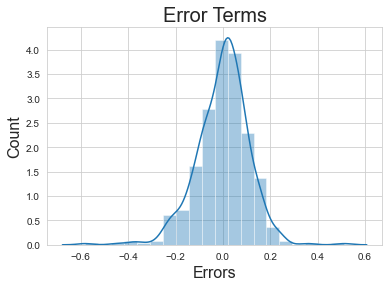

In [117]:
# Plotting an histogram of the error terms
res = y_train - y_train_pred
sns.distplot(res, bins=20)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

- As per the assumptions in Linear Regression, the error terms are normally distributed with mean=0.

## Making predictions

In [118]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [119]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Light rain
185,0,0,1,0.856704,0.519634,0.180484,0.511167,0,1,0,...,0,0,0,0,0,1,0,0,0,0
639,1,0,1,0.662528,0.882733,0.133655,0.508028,0,0,1,...,0,0,0,0,0,0,0,1,0,1
300,0,0,0,0.338555,0.513716,0.402389,0.400338,0,0,1,...,0,0,0,0,1,0,0,0,1,0
222,0,0,0,0.820361,0.304464,0.263333,0.526500,0,1,0,...,0,0,0,1,0,0,0,0,0,0
153,0,0,0,0.698871,0.214632,0.453215,0.589279,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [120]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Light rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.031963,0.698630,0.551850,0.562174,0.319257,0.484718,0.273973,0.237443,0.237443,...,0.082192,0.063927,0.155251,0.127854,0.146119,0.155251,0.127854,0.141553,0.310502,0.041096
std,0.500513,0.176306,0.459904,0.235346,0.179169,0.157824,0.227716,0.447017,0.426491,0.426491,...,0.275286,0.245183,0.362974,0.334692,0.354034,0.362974,0.334692,0.349389,0.463759,0.198967
min,0.000000,0.000000,0.000000,0.046591,0.131791,-0.042808,-0.049378,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.427649,0.213225,0.330677,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.561806,0.548144,0.303481,0.497042,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746636,0.689408,0.400400,0.635156,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.983385,1.012910,0.807474,0.941205,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
# Splitting the dataset into X and y data:

y_test = df_test.pop('cnt')
X_test = df_test

In [122]:
# Making use of the model to make predictions:

X_test_new = X_test[X.columns]
X_test_new = sm.add_constant(X_test_new)

In [123]:
X_test_new.head()

,const,yr,windspeed,Summer,Winter,September,October,Mist,Light rain,Fall,June,May,Monday
185,1.0,0,0.180484,0,0,0,0,0,0,1,0,0,0
639,1.0,1,0.133655,0,1,0,1,0,1,0,0,0,0
300,1.0,0,0.402389,0,1,0,1,1,0,0,0,0,0
222,1.0,0,0.263333,0,0,0,0,0,0,1,0,0,0
153,1.0,0,0.453215,1,0,0,0,0,0,0,1,0,0


In [124]:
# Making predictions:
y_test_pred = lr.predict(X_test_new)

#### Calculating r2 score again to validate the model

In [125]:
#import required library to calculate r2_score
from sklearn.metrics import r2_score

In [126]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7781895140327052

In [127]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.7781895140327052)*(12-1)/(12-1-1)
print(Adj_r2)

0.7560084654359758


### r2 score comparisons:

#### Training dataset:

    - r2 is 0.782
    - adjusted r2 is 0.777
    
#### Testing data predictions:

    - r2 is 0.778
    - adjusted r2 is 0.756
    
    
##### Observation:
    - It can be seen that the variation in r2 values is within 3%, so it can be said that the model has been built well.

In [128]:
X_train_new=X_train_sm.drop(['const'], axis=1)
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Summer,Fall,Winter,February,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Light rain
626,1,0,1,0.614763,0.450242,0.371638,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
364,0,0,1,0.437201,0.552447,0.382342,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.559440,0.255342,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.381387,0.663106,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.389456,0.188475,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [129]:
X_t=X_train_new.iloc[:,0].values

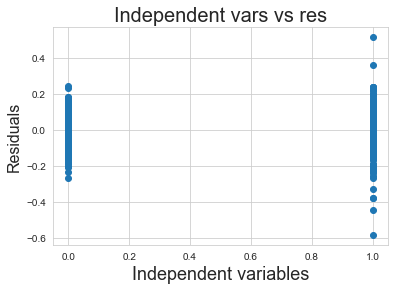

In [130]:
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
plt.title('Independent vars vs res', fontsize=20)       # Plot heading 
plt.xlabel('Independent variables', fontsize=18)           # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

## Model Evaluation

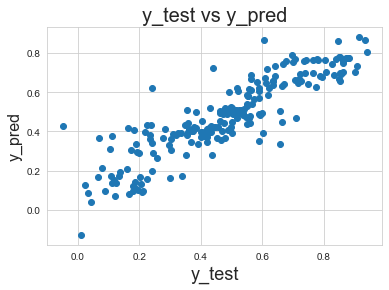

In [131]:
# Plotting y_test and y_pred to understand the spread:

plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

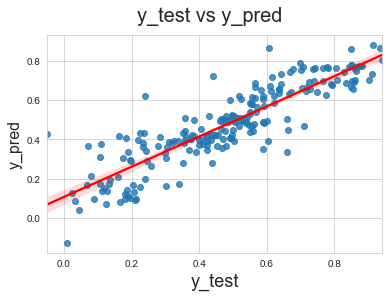

In [132]:
#Regression plot.
fig = plt.figure()
sns.regplot(y_test,y_test_pred,line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [133]:
print(X_train_sm.columns)
print(lr.summary())

Index(['const', 'yr', 'windspeed', 'Summer', 'Winter', 'September', 'October',
       'Mist', 'Light rain', 'Fall', 'June', 'May', 'Monday'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     148.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.94e-156
Time:                        15:58:04   Log-Likelihood:                 402.53
No. Observations:                 510   AIC:                            -779.1
Df Residuals:                     497   BIC:                            -724.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

### The equation of the best fitted line is:

### cnt = 0.225 + 0.301(Fall) + 0.261(yr) + 0.22(Summer) + 0.205(Winter) + 0.105(October) + 0.102(June) + 0.101(September) + 0.096(May) - 0.042(Monday) - 0.087(Mist) - 0.283(Light Rain)

    - Demand seems to increase in the Fall, Winter and Summer season with 'yr' and in the months of October, September, May and June. 
    - Demand decreases during the start of working week and when the weather is in 'Mist' or 'Light Rain' condition.